In [1]:
2+2

4

In [2]:
!pip install lsdb

  Using cached lsdb-0.2.1-py3-none-any.whl (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.4 MB/s eta 0:00:00
  Using cached hipscat-0.3.0-py3-none-any.whl (73 kB)
  Using cached pyarrow-16.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached lsst_sphgeom-26.2024.1700-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (709 kB)
  Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
  Using cached healpy-1.16.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.5 MB)
  Using cached numba-0.59.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
  Using cac

In [4]:
import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch

from hipscat.inspection import plot_pixels

'Version of lsdb is %s' % lsdb.__version__

'Version of lsdb is 0.2.1'

In [6]:
# Gaia
# gaia_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/gaia_dr3/gaia"

# ZTF
# ztf_object_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_dr14/"
# ztf_source_path = "https://epyc.astro.washington.edu/~lincc-frameworks/hipscat_surveys/ztf/ztf_source/"


BUCKET = "irsa-mast-tike-spitzer-data"
GAIA_PATH = f"s3://{BUCKET}/data/GAIA/dr3/gaiasource/hipscat/gaia-dr3-gaiasource-hipscat"
ZTF_OBJECTS_PATH = f"s3://{BUCKET}/data/ZTF/dr20/objects/hipscat/ztf-dr20-objects-hipscat"
# ZTF_SOURCES_PATH = f"s3://{BUCKET}/data/ZTF/dr20/lc/hipscat/ztf-dr20-lc-hipscat"  # not yet available

In [15]:
%%time
# load lite version of Gaia DR3 for quick cone searches
gaia_lite = lsdb.read_hipscat(GAIA_PATH, columns=["ra", "dec"], search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
#Load ZTF, Gaia, and ZTF sources hipscats # note data3/ for epyc
gaia = lsdb.read_hipscat(GAIA_PATH)

ztf = lsdb.read_hipscat(ZTF_OBJECTS_PATH) # ZTF Object
# ztf_source = lsdb.read_hipscat(ztf_source_path, columns=["ra", "dec"]) # ZTF Source

CPU times: user 454 ms, sys: 23.4 ms, total: 477 ms
Wall time: 1.39 s


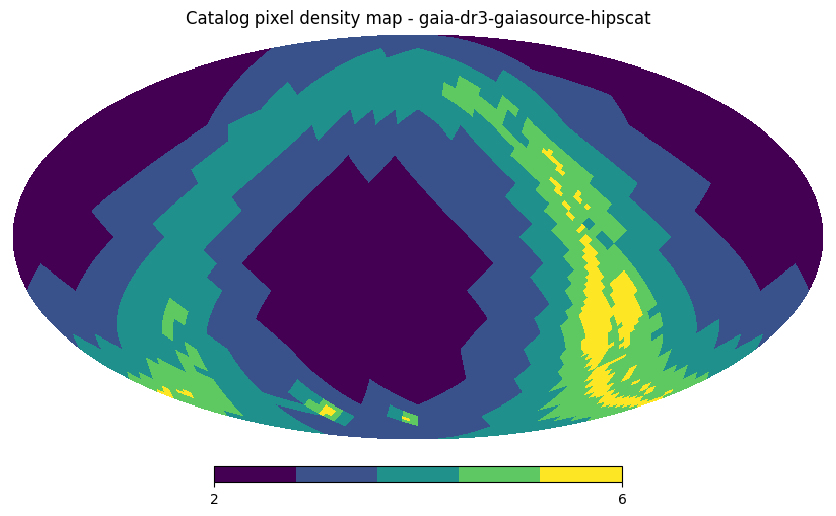

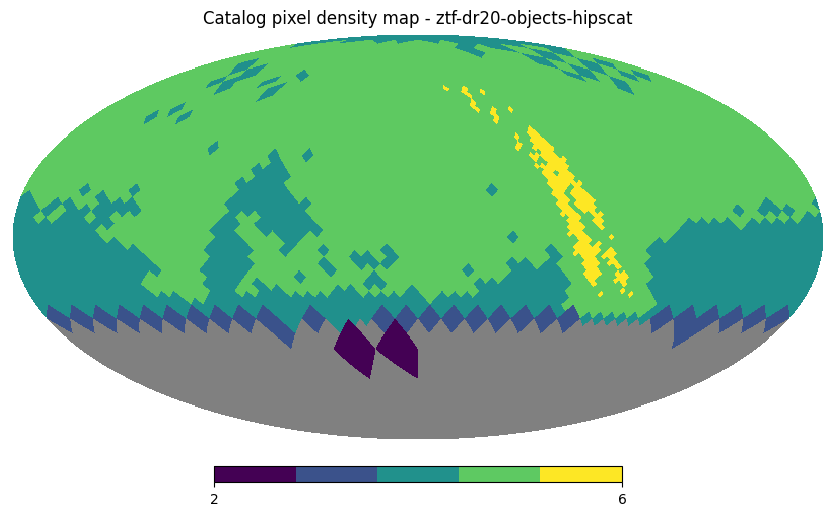

In [17]:
# Plot the Pixel Density Maps for Gaia and ZTF

plot_pixels(gaia.hc_structure)
plot_pixels(ztf.hc_structure)
# plot_pixels(ztf_source.hc_structure)

In [21]:
%%time 
# Cross-match Gaia and ZTF
xmatch_object = gaia_lite.crossmatch(ztf, require_right_margin = False)

xmatch_object.head(5)

/opt/conda/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be inaccurate
  warnings.warn("Right catalog does not have a margin cache. Results may be inaccurate", RuntimeWarning)


CPU times: user 4.48 s, sys: 2.4 s, total: 6.88 s
Wall time: 6.37 s


,ra_gaia-dr3-gaiasource-hipscat,dec_gaia-dr3-gaiasource-hipscat,oid_ztf-dr20-objects-hipscat,ra_ztf-dr20-objects-hipscat,dec_ztf-dr20-objects-hipscat,htm20_ztf-dr20-objects-hipscat,field_ztf-dr20-objects-hipscat,ccdid_ztf-dr20-objects-hipscat,qid_ztf-dr20-objects-hipscat,fid_ztf-dr20-objects-hipscat,...,stetsonj_ztf-dr20-objects-hipscat,stetsonk_ztf-dr20-objects-hipscat,uncalibmeanmag_ztf-dr20-objects-hipscat,vonneumannratio_ztf-dr20-objects-hipscat,weightedmagrms_ztf-dr20-objects-hipscat,weightedmeanmag_ztf-dr20-objects-hipscat,Norder_ztf-dr20-objects-hipscat,Dir_ztf-dr20-objects-hipscat,Npix_ztf-dr20-objects-hipscat,_dist_arcsec
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
3643412099679387648,300.938807,16.959530,592204100094175,300.938801,16.959553,13844633847308,592,4,1,2,...,NaN,NaN,0.0,1.939633,NaN,NaN,5,0,3236,0.083917
3643412100069457920,300.939196,16.960282,1588112200070698,300.939201,16.960285,13844633847466,1588,12,2,1,...,NaN,NaN,0.0,1.166992,NaN,NaN,5,0,3236,0.019159
3643412100413390848,300.938070,16.960664,592204100052864,300.938039,16.960796,13844633849518,592,4,1,2,...,NaN,NaN,0.0,1.919086,NaN,NaN,5,0,3236,0.488199
3643412102065946624,300.938019,16.961057,1587209100054186,300.938038,16.960851,13844633849618,1587,9,1,2,...,NaN,NaN,0.0,1.669878,NaN,NaN,5,0,3236,0.741758
3643412107736645632,300.934457,16.961220,1587209100009396,300.934453,16.961229,13844633633402,1587,9,1,2,...,NaN,NaN,0.0,1.800377,NaN,NaN,5,0,3236,0.032158


In [19]:
# Reading HiPSCat's from an 'almanac' ?

In [42]:
ztf.head(1)

FileNotFoundError: irsa-mast-tike-spitzer-data/data/ZTF/dr20/objects/hipscat/ztf-dr20-objects-hipscat/Norder=4/Dir=0/Npix=0.parquet

In [23]:
%%time
# crossmatch ZTF + Gaia
# names here are dr14, need to be moved to 22
_all_sky_object = gaia.crossmatch(ztf, require_right_margin = False).query(
    "nobs_g_ztf-dr20-objects-hipscat > 50 and nobs_r_ztf-dr20-objects-hipscat > 50 and \
    parallax_gaia > 0 and parallax_over_error_gaia > 5 and \
    teff_gspphot_gaia > 5380 and teff_gspphot_gaia < 7220 and logg_gspphot_gaia > 4.5 \
    and logg_gspphot_gaia < 4.72 and classprob_dsc_combmod_star_gaia > 0.5")

/opt/conda/lib/python3.10/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be inaccurate
  warnings.warn("Right catalog does not have a margin cache. Results may be inaccurate", RuntimeWarning)


ValueError: Metadata inference failed in `query`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
UndefinedVariableError("name 'nobs_g_ztf' is not defined")

Traceback:
---------
  File "/opt/conda/lib/python3.10/site-packages/dask/dataframe/utils.py", line 195, in raise_on_meta_error
    yield
  File "/opt/conda/lib/python3.10/site-packages/dask/dataframe/core.py", line 7175, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/opt/conda/lib/python3.10/site-packages/dask/utils.py", line 1241, in __call__
    return getattr(__obj, self.method)(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/frame.py", line 4823, in query
    res = self.eval(expr, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/frame.py", line 4949, in eval
    return _eval(expr, inplace=inplace, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/eval.py", line 336, in eval
    parsed_expr = Expr(expr, engine=engine, parser=parser, env=env)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 809, in __init__
    self.terms = self.parse()
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 828, in parse
    return self._visitor.visit(self.expr)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 418, in visit_Module
    return self.visit(expr, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 421, in visit_Expr
    return self.visit(node.value, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 746, in visit_BoolOp
    return reduce(visitor, operands)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 739, in visitor
    lhs = self._try_visit_binop(x)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 735, in _try_visit_binop
    return self.visit(bop)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 719, in visit_Compare
    return self.visit(binop)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 532, in visit_BinOp
    op, op_class, left, right = self._maybe_transform_eq_ne(node)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 452, in _maybe_transform_eq_ne
    left = self.visit(node.left, side="left")
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 532, in visit_BinOp
    op, op_class, left, right = self._maybe_transform_eq_ne(node)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 452, in _maybe_transform_eq_ne
    left = self.visit(node.left, side="left")
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 532, in visit_BinOp
    op, op_class, left, right = self._maybe_transform_eq_ne(node)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 452, in _maybe_transform_eq_ne
    left = self.visit(node.left, side="left")
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 532, in visit_BinOp
    op, op_class, left, right = self._maybe_transform_eq_ne(node)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 452, in _maybe_transform_eq_ne
    left = self.visit(node.left, side="left")
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 412, in visit
    return visitor(node, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expr.py", line 545, in visit_Name
    return self.term_type(node.id, self.env, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/ops.py", line 91, in __init__
    self._value = self._resolve_name()
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/ops.py", line 115, in _resolve_name
    res = self.env.resolve(local_name, is_local=is_local)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/computation/scope.py", line 244, in resolve
    raise UndefinedVariableError(key, is_local) from err
